In [26]:
import time
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import plotly.express as px
import pandas_datareader as pdr
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#### 1. Understanding data-driven decision data pull

In [27]:
end = date.today()
print(f'Year = {end.year}; month = {end.month}; day = {end.day}')

start = date(year = end.year - 70, month = end.month, day = end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month = 5; day = 22
Period for indexes: 1954-05-22 to 2024-05-22 


1.1 GDP

In [28]:
gdppot = pdr.DataReader("GDPPOT", "fred", start = start)
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT / gdppot.GDPPOT.shift(4) - 1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT / gdppot.GDPPOT.shift(4) - 1

gdppot.tail()

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2023-04-01,22246.23,0.021312,0.021312
2023-07-01,22369.71,0.021719,0.021719
2023-10-01,22495.19,0.022190,0.022190
2024-01-01,22618.15,0.022251,0.022251
2024-04-01,22739.00,0.022151,0.022151


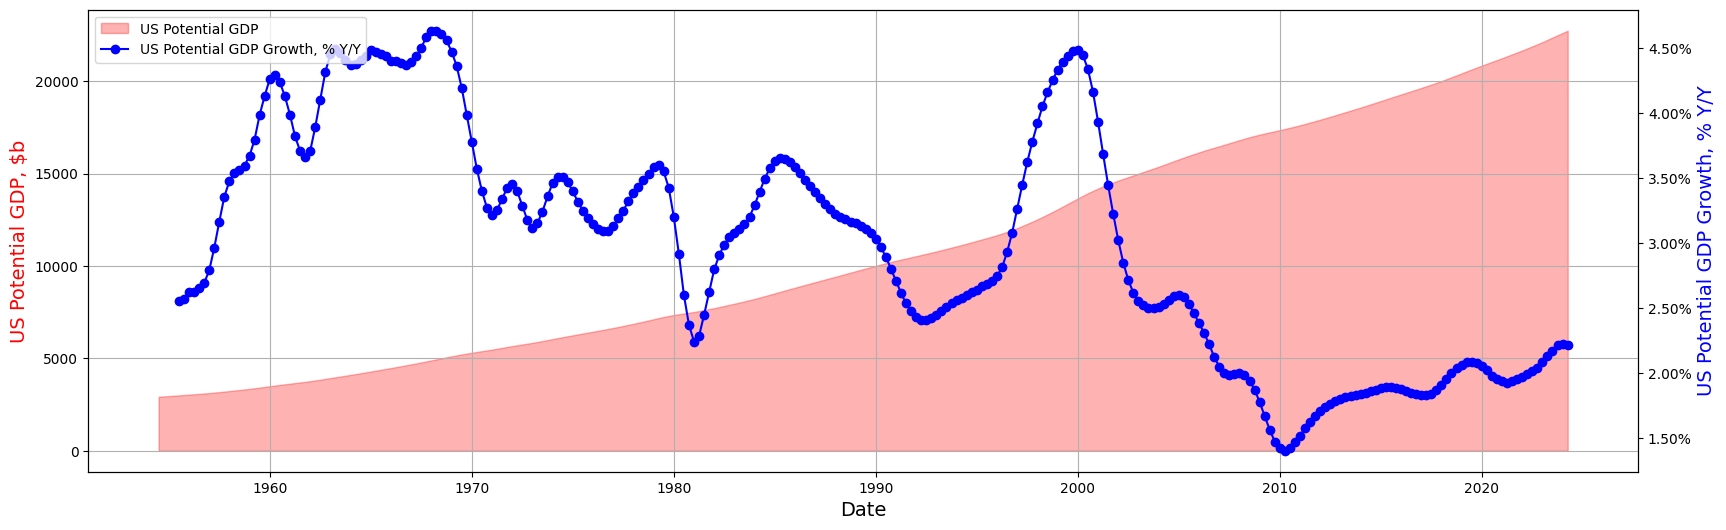

In [29]:
fig, ax = plt.subplots(figsize = (20, 6))
plt.grid(True)

# plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color = "red", alpha = 0.3, label = "US Potential GDP")

# creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color = "blue", marker = "o", label = "US Potential GDP Growth, % Y/Y")

# setting labels and title
ax.set_xlabel("Date", fontsize = 14)
ax.set_ylabel("US Potential GDP, $b", color = "red", fontsize = 14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color = "blue", fontsize = 14)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc = 'upper left')

plt.show()

1.2 Inflation - CPI Core

In [32]:
cpilfesl = pdr.DataReader("CPILFESL", "fred", start = start)
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL / cpilfesl.CPILFESL.shift(12) - 1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL / cpilfesl.CPILFESL.shift(1) - 1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2023-04-01,306.539,0.055157,0.004677
2023-05-01,307.646,0.053322,0.003611
2023-06-01,308.245,0.048552,0.001947
2023-07-01,308.945,0.047076,0.002271
2023-08-01,309.656,0.044128,0.002301
2023-09-01,310.644,0.041437,0.003191
2023-10-01,311.390,0.040217,0.002401
2023-11-01,312.349,0.040151,0.003080
2023-12-01,313.209,0.039101,0.002753


In [ ]:
fig, ax = plt.subplots(figsize = (20, 6))
plt.grid(True)

# plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color = "red", alpha = 0.3, label = "Core CPI index (monthly)")

# creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color = "blue", marker = "o", label = "Core CPI index (monthly) Growth, % Y/Y")

# setting labels and title
ax.set_xlabel("Date", fontsize = 14)
ax.set_ylabel("Core CPI index (monthly)", color = "red", fontsize = 14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color = "blue", fontsize = 14)

# adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc = 'upper left')

plt.show()

1.3 Interest Rate

In [33]:
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start = start)
fedfunds.tail()

,FEDFUNDS
DATE,
2023-12-01,5.33
2024-01-01,5.33
2024-02-01,5.33
2024-03-01,5.33
2024-04-01,5.33


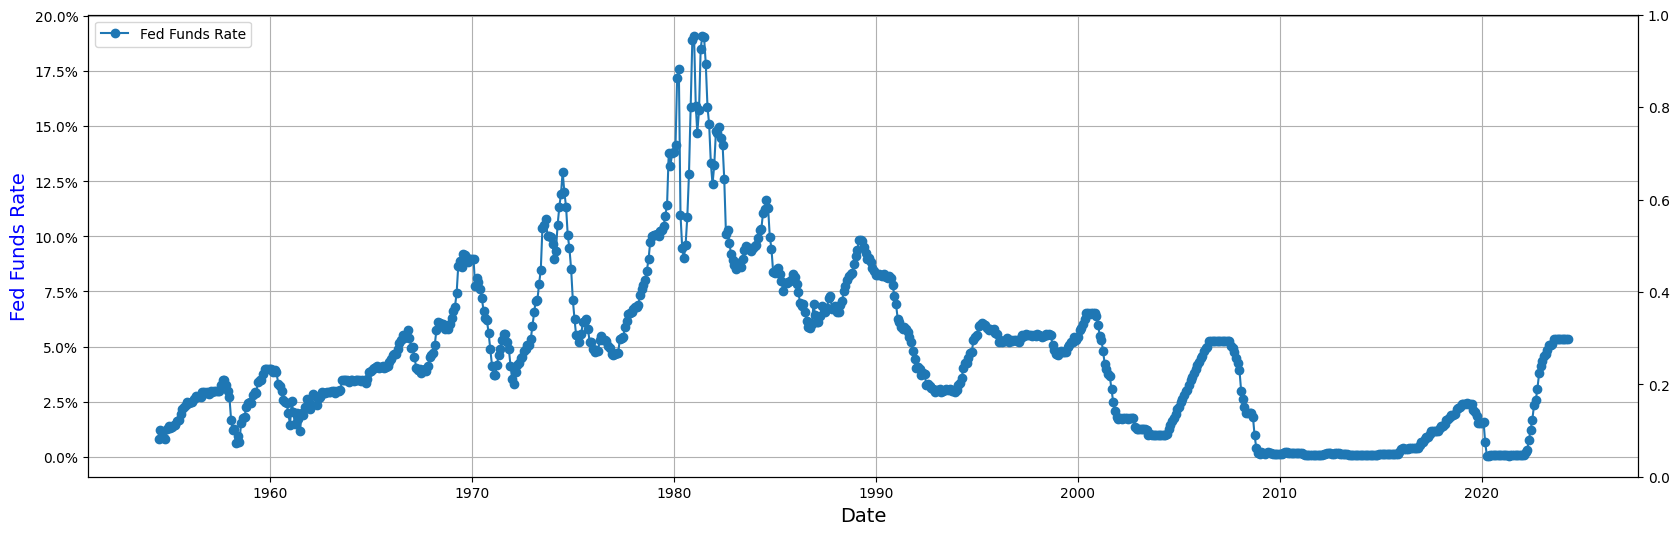

In [39]:
fig, ax = plt.subplots(figsize = (20, 6))
plt.grid(True)

# plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color = "red", alpha = 0.3, label = "Core CPI index (monthly)")

# creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS / 100, marker = "o", label = "Fed Funds Rate")

# setting labels and title
ax.set_xlabel("Date", fontsize = 14)
ax.set_ylabel("Fed Funds Rate", color = "blue", fontsize = 14)

# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'upper left')

plt.show()

In [40]:
dgs1 = pdr.DataReader("DGS1", "fred", start = start)
dgs1.tail()

,DGS1
DATE,
2024-05-14,5.16
2024-05-15,5.10
2024-05-16,5.13
2024-05-17,5.14
2024-05-20,5.15


In [41]:
dgs5 = pdr.DataReader("DGS5", "fred", start = start)
dgs5.tail()

,DGS5
DATE,
2024-05-14,4.46
2024-05-15,4.35
2024-05-16,4.40
2024-05-17,4.44
2024-05-20,4.46


In [42]:
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index['spx_dod'] = (spx_index.Close / spx_index.Close.shift(-1) - 1)
spx_index['spx_qoq'] = (spx_index.Close / spx_index.Close.shift(-63) - 1)
spx_index['spx_yoy'] = (spx_index.Close / spx_index.Close.shift(-252) - 1)

spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-21,5298.69,5324.32,5297.87,5321.41,1.987813e+09
2024-05-20,5305.35,5325.32,5302.40,5308.13,1.850086e+09
2024-05-17,5303.10,5305.45,5283.59,5303.27,1.970450e+09
2024-05-16,5310.07,5325.49,5296.19,5297.10,2.208658e+09
2024-05-15,5263.26,5311.76,5263.26,5308.15,2.316275e+09


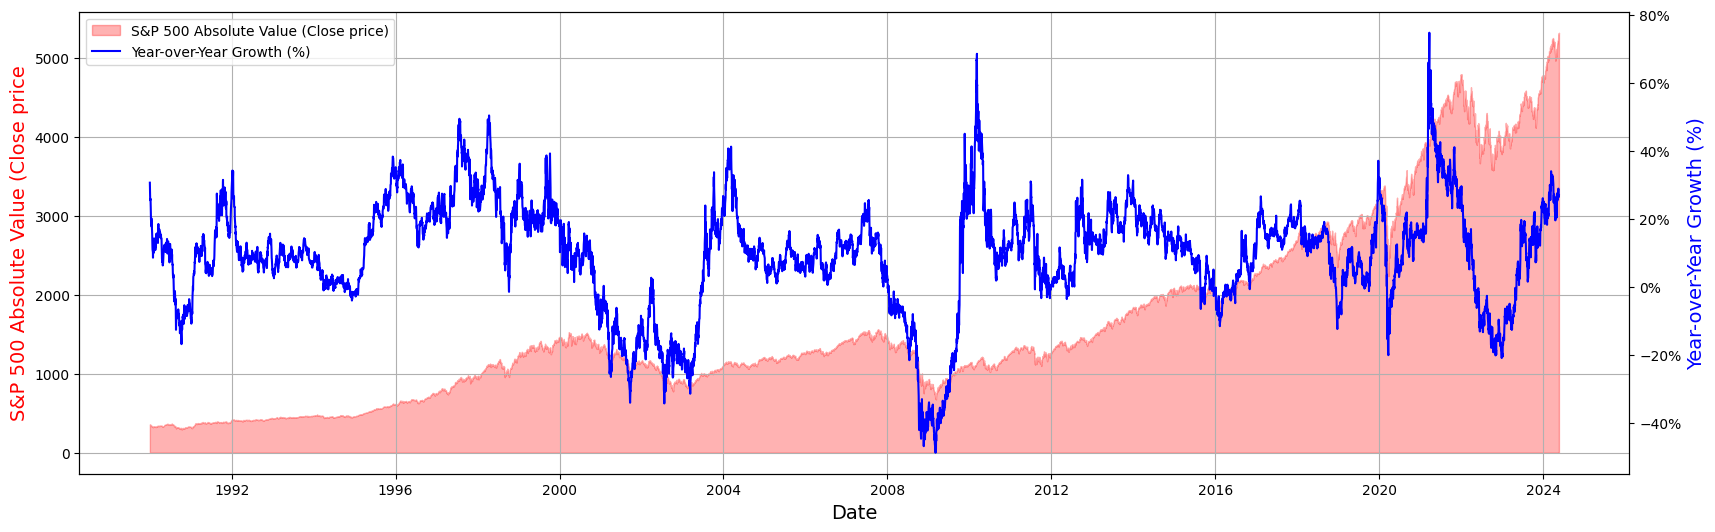

In [44]:
spx_truncated = spx_index[spx_index.index >= '1990-01-01']

fig, ax = plt.subplots(figsize = (20, 6))
plt.grid(True)

# plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color = "red", alpha = 0.3, label = "S&P 500 Absolute Value (Close price)")

# creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
    color = "blue", 
    #marker = ".",
    label = "Year-over-Year Growth (%)"
)

# setting labels and title
ax.set_xlabel("Date", fontsize = 14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color = "red", fontsize = 14)
ax2.set_ylabel("Year-over-Year Growth (%)", color = "blue", fontsize = 14)

# adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc = 'upper left')

plt.show()

#### 2) Data Source for Stock

2.1 OHLCV data daily - Index

In [46]:
dax_daily = yf.download(tickers = "^GDAXI",
                period = "max",
                interval = "1d"
            )

dax_daily.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-16,18874.849609,18890.779297,18716.330078,18738.810547,18738.810547,76322100
2024-05-17,18713.250000,18724.019531,18627.910156,18704.419922,18704.419922,75994100
2024-05-20,18710.130859,18804.000000,18710.130859,18768.960938,18768.960938,41185400
2024-05-21,18768.640625,18768.640625,18638.140625,18726.759766,18726.759766,65727800
2024-05-22,18731.650391,18731.650391,18642.199219,18666.779297,18666.779297,0


In [48]:
# normally 252 trading day
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] - 1

dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,NaN,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,NaN,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,NaN,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-05-16,18874.849609,18890.779297,18716.330078,18738.810547,18738.810547,76322100,16223.990234,0.155006
2024-05-17,18713.250000,18724.019531,18627.910156,18704.419922,18704.419922,75994100,16152.860352,0.157963
2024-05-20,18710.130859,18804.000000,18710.130859,18768.960938,18768.960938,41185400,15842.129883,0.184750


<Axes: xlabel='Date'>

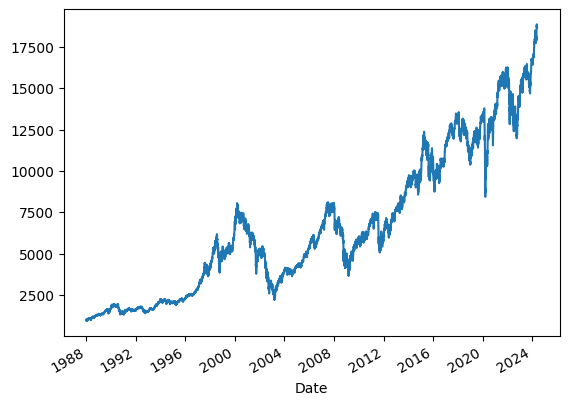

In [49]:
dax_daily['Adj Close'].plot.line()

In [51]:
snp500_daily = yf.download(tickers = "^SPX",
    period = "max",
    interval = "1d"
)

snp500_daily.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-15,5263.259766,5311.759766,5263.259766,5308.149902,5308.149902,4360810000
2024-05-16,5310.069824,5325.490234,5296.189941,5297.100098,5297.100098,3817470000
2024-05-17,5303.100098,5305.450195,5283.589844,5303.270020,5303.270020,3578120000
2024-05-20,5305.350098,5325.319824,5302.399902,5308.129883,5308.129883,3420100000
2024-05-21,5298.689941,5324.319824,5297.870117,5321.410156,5321.410156,3662240000


In [52]:
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
    period = "max",
    interval = "1d"
)

snp500_daily_non_delayed.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-15,5263.259766,5311.759766,5263.259766,5308.149902,5308.149902,4360810000
2024-05-16,5310.069824,5325.490234,5296.189941,5297.100098,5297.100098,3817470000
2024-05-17,5303.100098,5305.450195,5283.589844,5303.270020,5303.270020,3578120000
2024-05-20,5305.350098,5325.319824,5302.399902,5308.129883,5308.129883,3420100000
2024-05-21,5298.689941,5324.319824,5297.870117,5321.410156,5321.410156,3662240000


In [55]:
dji_daily = yf.download(tickers = "^DJI",
    period = "max",
    interval = "1d"
)

[*********************100%%**********************]  1 of 1 completed
